# Domestic Violence Against Women Classification

### Downloading Dataset


In [1]:
import os

# Create the .kaggle directory
!mkdir -p ~/.kaggle

# Move the kaggle.json file to the .kaggle directory
!cp kaggle.json ~/.kaggle/

# Set the permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Install Kaggle CLI
!pip install kaggle

# Download the Alzheimer's Disease Dataset from Kaggle
dataset_name = 'fahmidachowdhury/domestic-violence-against-women'

# Download the dataset using Kaggle API
!kaggle datasets download -d {dataset_name}

Dataset URL: https://www.kaggle.com/datasets/fahmidachowdhury/domestic-violence-against-women
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/2.00k [00:00<?, ?B/s]
100% 2.00k/2.00k [00:00<00:00, 4.40MB/s]


In [2]:
!unzip -o '*.zip' -d ./domestic-violence-against-women

# List the files to check the correct name
!ls ./domestic-violence-against-women

Archive:  domestic-violence-against-women.zip
  inflating: ./domestic-violence-against-women/Domestic violence.csv  
'Domestic violence.csv'


### Importing necessary libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

### Reading CSV file

In [15]:
df = pd.read_csv('./domestic-violence-against-women/Domestic violence.csv')
df.columns = ["Sno", "Age", "Education", "Employment", "Income", "Marital Status", "Target"]
df.head()

,Sno,Age,Education,Employment,Income,Marital Status,Target
0,1,30,secondary,unemployed,0,married,yes
1,2,47,tertiary,unemployed,0,married,no
2,3,24,tertiary,unemployed,0,unmarred,no
3,4,22,tertiary,unemployed,0,unmarred,no
4,5,50,primary,unemployed,0,married,yes


### Data Preprocessing

In [17]:
df1 = df['Target']
le = LabelEncoder()
df1 = le.fit_transform(df1)
df['Target']= df1
df.head()

,Sno,Age,Education,Employment,Income,Marital Status,Target
0,1,30,secondary,unemployed,0,married,1
1,2,47,tertiary,unemployed,0,married,0
2,3,24,tertiary,unemployed,0,unmarred,0
3,4,22,tertiary,unemployed,0,unmarred,0
4,5,50,primary,unemployed,0,married,1


In [21]:
df1 = ['Education', 'Employment', 'Marital Status']
oe = OrdinalEncoder()
df[df1] = oe.fit_transform(df[df1])
df.head()

,Sno,Age,Education,Employment,Income,Marital Status,Target
0,1,30,2.0,3.0,0,0.0,1
1,2,47,3.0,3.0,0,0.0,0
2,3,24,3.0,3.0,0,1.0,0
3,4,22,3.0,3.0,0,1.0,0
4,5,50,1.0,3.0,0,0.0,1


### Data Summary

In [18]:
df.size

2429

In [19]:
df.describe()

,Sno,Age,Income,Target
count,347.000000,347.000000,347.000000,347.000000
mean,174.000000,31.380403,2110.685879,0.247839
std,100.314505,9.601569,5743.278766,0.432381
min,1.000000,15.000000,0.000000,0.000000
25%,87.500000,23.000000,0.000000,0.000000
50%,174.000000,30.000000,0.000000,0.000000
75%,260.500000,39.500000,0.000000,0.000000
max,347.000000,60.000000,35000.000000,1.000000


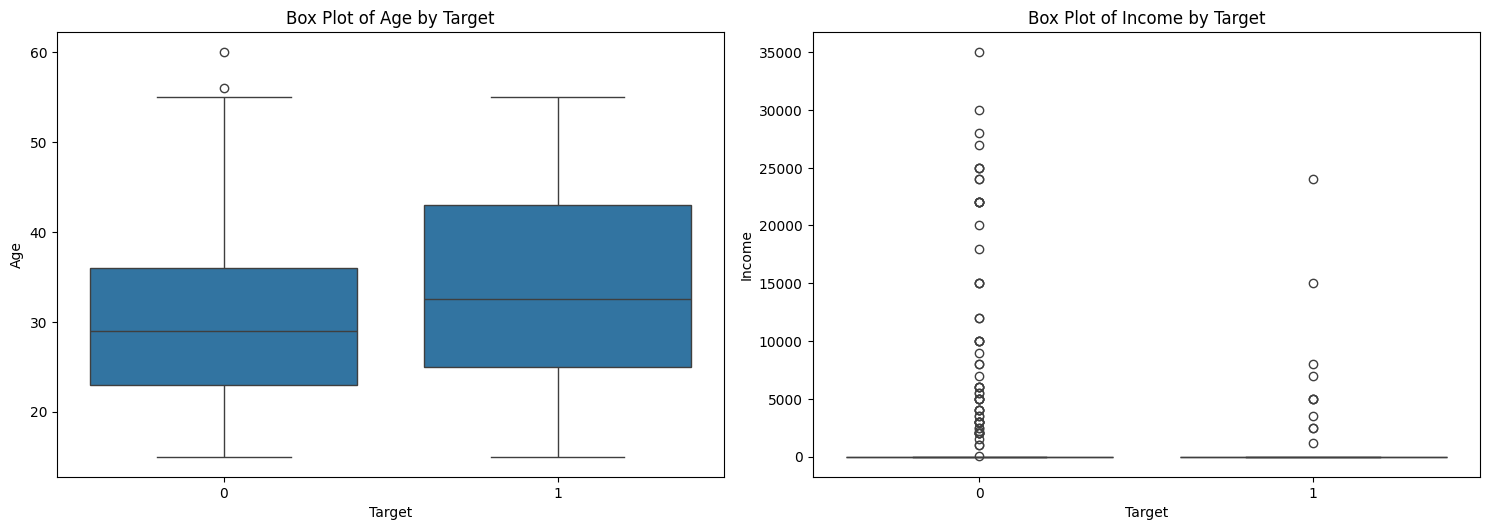

In [30]:
fig = plt.figure(figsize=(15,10))

# Age vs Target
ax1 = fig.add_subplot(2,2,1)
sns.boxplot(x='Target', y='Age', data=df)
plt.xlabel('Target')
plt.ylabel('Age')
plt.title('Box Plot of Age by Target')


# Income vs Target
ax2 = fig.add_subplot(2,2,2)
sns.boxplot(x='Target', y='Income', data=df)
plt.xlabel('Target')
plt.ylabel('Income')
plt.title('Box Plot of Income by Target')


plt.tight_layout()
plt.show()

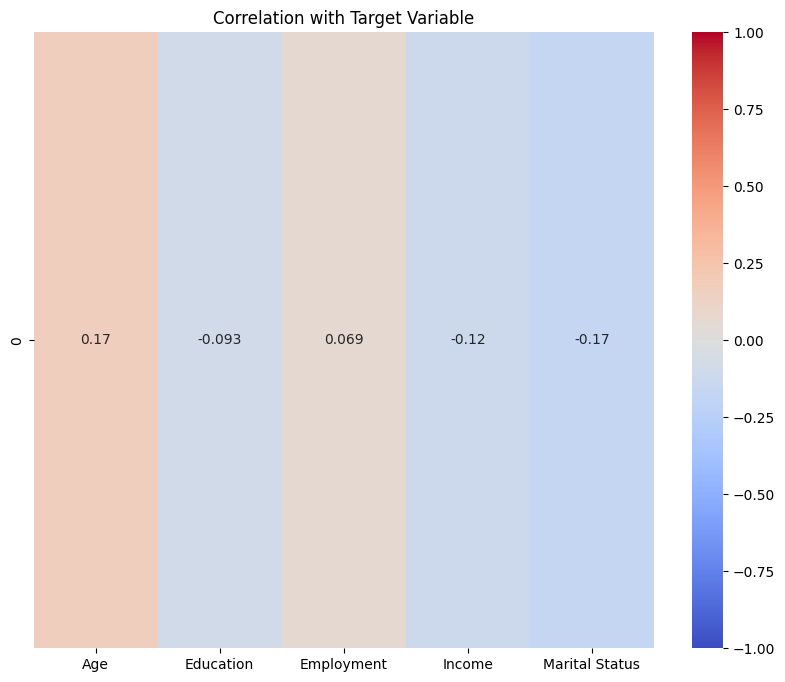

In [38]:
corr_with_target = df.drop(['Target', 'Sno'], axis=1).corrwith(df['Target'])

plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_target.to_frame().T, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Target Variable')
plt.show()

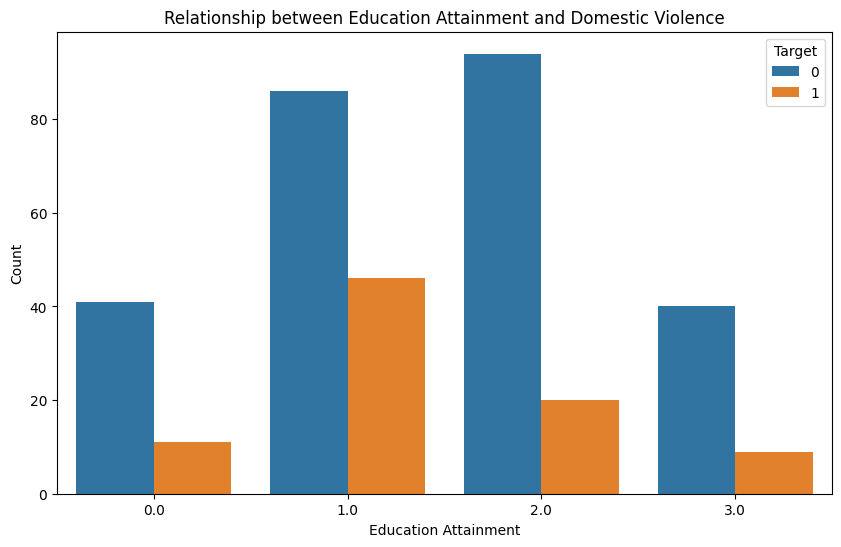

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(x='Education', hue='Target', data=df)
plt.title("Relationship between Education Attainment and Domestic Violence")
plt.xlabel("Education Attainment")
plt.ylabel("Count")
plt.show()

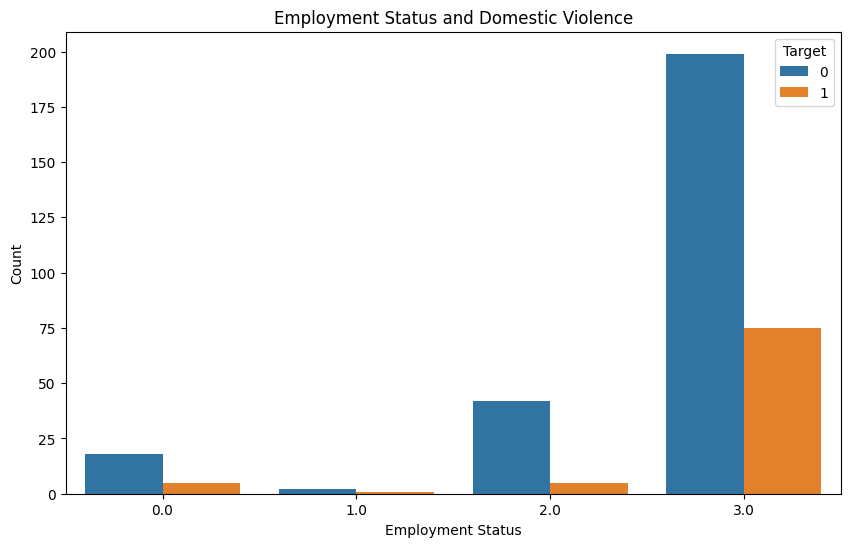

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(x='Employment', hue='Target', data=df)
plt.title("Employment Status and Domestic Violence")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.show()

### Splitting data

In [40]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(['Target', 'Sno'], axis=1), df['Target'], test_size=0.2, random_state=42)

### Training Model

In [54]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train, eval_metric='logloss', eval_set=[(x_test, y_test)], verbose=True, early_stopping_rounds=10)
xgB = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=5)
scores = cross_val_score(xgB, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

[0]	validation_0-logloss:0.55354
[1]	validation_0-logloss:0.55052
[2]	validation_0-logloss:0.54956
[3]	validation_0-logloss:0.55698
[4]	validation_0-logloss:0.56263
[5]	validation_0-logloss:0.56454
[6]	validation_0-logloss:0.57106
[7]	validation_0-logloss:0.58087
[8]	validation_0-logloss:0.58302
[9]	validation_0-logloss:0.58943
[10]	validation_0-logloss:0.59475
[11]	validation_0-logloss:0.59970
[12]	validation_0-logloss:0.60174
Cross-Validation Accuracy Scores: [0.76785714 0.58928571 0.78181818 0.72727273 0.72727273]
Mean Accuracy: 0.7187012987012988


In [55]:
y_pred = xgb_model.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.7428571428571429


In [56]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = xgb_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.98      0.85        52
           1       0.50      0.06      0.10        18

    accuracy                           0.74        70
   macro avg       0.62      0.52      0.47        70
weighted avg       0.69      0.74      0.66        70

[[51  1]
 [17  1]]
